In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
location=r'G:\Python_dataframes\Retail\train_Retail.csv'
df=pd.read_csv(location)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [3]:
df.shape

(379336, 8)

In [4]:
df['CustomerID'].nunique()

4353

In [5]:
df.isna().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [6]:
 df.duplicated().sum()

2673

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(376663, 8)

In [9]:
df.isna().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94243
Country            0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(282420, 8)

In [12]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,282420.000000,282420.000000,282420.000000
mean,12.110283,3.526323,15283.894880
std,297.109127,80.691250,1712.665383
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13952.000000
50%,5.000000,1.950000,15150.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


##### We can see negative value for quantity. that indicates cancelled orders. If we remove the cancelled ordres we have to remove the corresponding positive orders as well. So we will keep the negative orders and do the analysis with available data. Monetary value that we will calculate further will have no effect of this as negative and corresponding positive values will cancel out each other.

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom
...,...,...,...,...,...,...,...,...
379330,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom


## Cohort Analysis

### Creating Month Cohorts and Finding active customers in cohort

In [15]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [16]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].head()

1   2011-06-08 14:57:00
2   2011-05-04 10:58:00
3   2011-01-20 12:16:00
4   2010-12-10 17:26:00
5   2011-05-08 15:20:00
Name: InvoiceDate, dtype: datetime64[ns]

In [17]:
df['CustomerID'] = df['CustomerID'].astype(object)
df['CustomerID'].head()

1    16126.0
2    18118.0
3    15529.0
4    14448.0
5    13911.0
Name: CustomerID, dtype: object

In [18]:
df['month'] = df['InvoiceDate'].dt.month_name()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,June
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,May
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,January
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,December
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,May


In [19]:
df['month'].unique()

array(['June', 'May', 'January', 'December', 'September', 'October',
       'February', 'November', 'July', 'August', 'March', 'April'],
      dtype=object)

## Cohort Analysis

In [20]:
import datetime as dt
def get_month(x) : return dt.datetime(x.year,x.month,1)

In [21]:
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,InvoiceMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,June,2011-06-01
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,May,2011-05-01
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,January,2011-01-01
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,December,2010-12-01
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,May,2011-05-01


In [22]:
group = df.groupby('CustomerID')['InvoiceMonth']
group.head(10)

1        2011-06-01
2        2011-05-01
3        2011-01-01
4        2010-12-01
5        2011-05-01
            ...    
378749   2011-12-01
378910   2011-06-01
378932   2011-05-01
378956   2011-02-01
379233   2011-09-01
Name: InvoiceMonth, Length: 39242, dtype: datetime64[ns]

In [23]:
df['CohortMonth'] = group.transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,InvoiceMonth,CohortMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,June,2011-06-01,2011-02-01
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,May,2011-05-01,2010-12-01
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,January,2011-01-01,2010-12-01
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,December,2010-12-01,2010-12-01
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,May,2011-05-01,2011-02-01


In [24]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'month', 'InvoiceMonth',
       'CohortMonth'],
      dtype='object')

In [25]:
from dateutil import relativedelta as rd
def months(date1,date2):
    diff = rd.relativedelta(date1,date2)
    return diff.years*12 +diff.months

In [26]:
#Cohort index is months passed since first purchase
df['CohortIndex']  = df.apply(lambda row : months(row.InvoiceMonth,row.CohortMonth)+1,axis =1)

In [27]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'month', 'InvoiceMonth',
       'CohortMonth', 'CohortIndex'],
      dtype='object')

In [28]:
df[['CustomerID','CohortIndex','InvoiceMonth','CohortMonth']].head()

,CustomerID,CohortIndex,InvoiceMonth,CohortMonth
1,16126.0,5,2011-06-01,2011-02-01
2,18118.0,6,2011-05-01,2010-12-01
3,15529.0,2,2011-01-01,2010-12-01
4,14448.0,1,2010-12-01,2010-12-01
5,13911.0,4,2011-05-01,2011-02-01


In [29]:
# active monthly customers in each cohort
cohort = df.groupby(['CohortIndex','CohortMonth']).CustomerID.apply(pd.Series.nunique).reset_index()
cohort

,CohortIndex,CohortMonth,CustomerID
0,1,2010-12-01,929
1,1,2011-01-01,422
2,1,2011-02-01,377
3,1,2011-03-01,441
4,1,2011-04-01,298
...,...,...,...
86,11,2011-01-01,157
87,11,2011-02-01,32
88,12,2010-12-01,460
89,12,2011-01-01,66


In [30]:
counts = cohort.pivot(index = 'CohortMonth', columns = 'CohortIndex', values = 'CustomerID' )
retention = counts.divide(counts.iloc[:,0],axis =0).round(3)*100
retention.index = retention.index.date

In [31]:
counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,929.0,350.0,297.0,353.0,332.0,367.0,351.0,322.0,325.0,361.0,344.0,460.0,248.0
2011-01-01,422.0,102.0,120.0,104.0,141.0,122.0,113.0,109.0,132.0,148.0,157.0,66.0,NaN
2011-02-01,377.0,91.0,72.0,101.0,102.0,91.0,95.0,101.0,97.0,117.0,32.0,NaN,NaN
2011-03-01,441.0,81.0,110.0,93.0,101.0,76.0,113.0,103.0,125.0,37.0,NaN,NaN,NaN
2011-04-01,298.0,67.0,65.0,60.0,61.0,71.0,69.0,78.0,23.0,NaN,NaN,NaN,NaN
2011-05-01,278.0,60.0,48.0,48.0,59.0,69.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,238.0,46.0,43.0,62.0,57.0,80.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,192.0,39.0,38.0,45.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,166.0,38.0,41.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

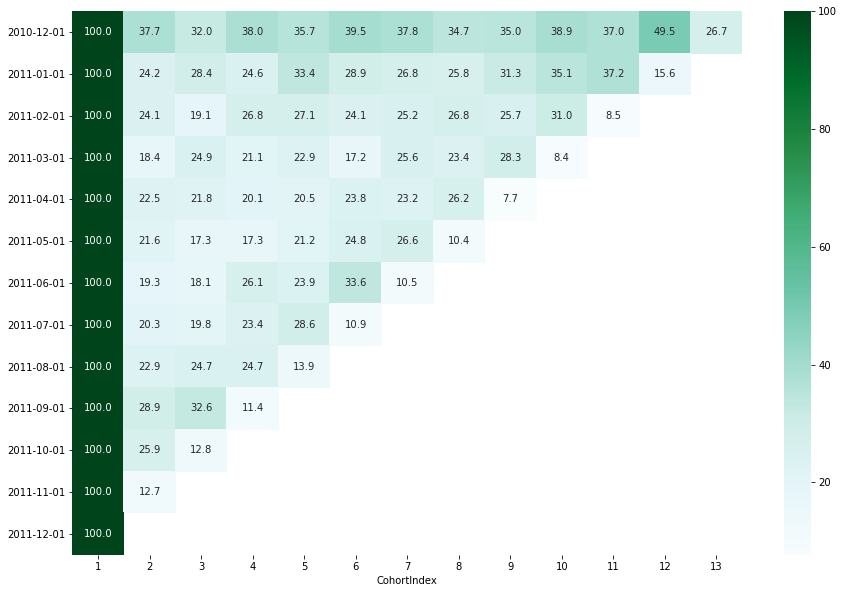

In [33]:
plt.figure(figsize =(15,10))
sns.heatmap(data = retention, annot = True , fmt = '0.1f', cmap = 'BuGn')
plt.show()

## Building and RFM Model (Recency, Frequency and Monetary) 

#### Recency is the time in no. of days since last transaction
#### Frequency is  count of purchases done 
#### Monetary value  is total amount spend 

In [34]:
df['Total_sum'] = df['UnitPrice'] * df['Quantity']

In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,InvoiceMonth,CohortMonth,CohortIndex,Total_sum
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,June,2011-06-01,2011-02-01,5,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,May,2011-05-01,2010-12-01,6,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,January,2011-01-01,2010-12-01,2,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,December,2010-12-01,2010-12-01,1,19.50
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,May,2011-05-01,2011-02-01,4,15.00


In [36]:
df.to_csv('Retail_data.csv')

In [37]:
## For recency we will consider the date of analysis as the date which is 1 day more than the last transaction date.
## Most Recent customers will be those whose Recency number is less.
## Also the frequency of the customer will show that whether the customer is regular or not.
## The customer with less Recency number and more frequency can be called as regular customer of the store till the 
##last date of transaction.
## The customer with high monetary value is also the valuable customer as he has contrinuted more for the earning of the store.

In [38]:
date_of_analysis = df.InvoiceDate.max().date() + dt.timedelta(days=1)

In [39]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (date_of_analysis - x.max().date()).days, 
                                       'InvoiceNo':'count',
                                       'Total_sum':'sum'})
rfm.rename(columns = {'InvoiceDate':'Recency','InvoiceNo':'Frequency', 'Total_sum':'MonetaryValue'}, inplace = True)

In [40]:
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,132,3124.96
12348.0,76,20,1009.88
12349.0,19,50,1344.17
12350.0,311,11,213.30


## Build RFM Segments

#### Give ratings to customers by dividing recency , frequency and Monetary vlaues into quartiles.
#### Combine all three ratings to get RFM segments based on combined rating.
#### Getting RFM score by combinig three ratings. 

In [41]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,4353.000000,4353.000000,4353.000000
mean,93.196187,64.879394,1325.708170
std,101.155969,161.444665,5550.920007
min,1.000000,1.000000,-4287.630000
25%,18.000000,12.000000,200.770000
50%,51.000000,29.000000,457.100000
75%,145.000000,71.000000,1136.800000
max,374.000000,5511.000000,190309.320000


#### From the descriptive statistics it can be seen that the all the columns of rfm data are positively skewed. This can be known by the fact that 50% quartile (median) is less than the mean. We will not remove the outliers as the customers with higher value of rfm metrics are important for our analysis

#### for recency lower value is better 
#### for frequency and Monetary higher value is better

In [42]:
rfm['R']=pd.qcut(rfm['Recency'],q=4,labels=range(4,0,-1))
rfm['F']=pd.qcut(rfm['Frequency'],q=4,labels=range(1,5))
rfm['M']=pd.qcut(rfm['MonetaryValue'],q=4,labels=range(1,5))

In [43]:
rfm.head(10)

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,3,132,3124.96,4,4,4
12348.0,76,20,1009.88,2,2,3
12349.0,19,50,1344.17,3,3,4
12350.0,311,11,213.30,1,1,2
12352.0,37,65,1469.03,3,3,4
12353.0,205,3,71.30,1,1,1
12354.0,233,47,848.02,1,3,3
12355.0,215,9,370.80,1,1,2


In [44]:
## create a combined rfm segemnt by combinnig the labels of the three segments
rfm['RFM_segment'] = rfm.R.astype('str') + rfm.F.astype('str') + rfm.M.astype('str')

In [45]:
## create a column by giving RFM score as sum of the labes
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis = 1)

In [46]:
rfm.head(10)
rfm.shape

(4353, 8)

In [47]:
rfm.RFM_segment.value_counts()

444    467
111    392
344    206
122    188
211    181
      ... 
314      8
142      6
124      5
414      4
241      1
Name: RFM_segment, Length: 61, dtype: int64

In [48]:
## Analyze the segments: To find the rfm segments in which the number of customers are higher
rfm.RFM_segment.value_counts().sort_values(ascending=False).head(5)

444    467
111    392
344    206
122    188
211    181
Name: RFM_segment, dtype: int64

#### Out of 4353 Customers 392 customers were of lowest value that is they bought the order many days before and only once and also the purchase cost was less
#### Out of 4353 Customers 467 Customers were of highest value that is they bought the order most recently, had more number of orders and purchase was valuable too.

In [49]:
rfm_analysis = rfm.groupby('RFM_Score').mean().round(2)
rfm_analysis.insert(0,'size',rfm.groupby('RFM_Score').size())

In [50]:
rfm_analysis

,size,Recency,Frequency,MonetaryValue
RFM_Score,,,,
3,392,265.71,5.66,85.09
4,398,181.35,9.89,145.79
5,504,146.12,14.46,232.70
6,452,101.17,20.12,369.67
7,434,81.38,27.78,501.02
8,497,61.69,39.45,667.17
9,392,47.45,55.96,974.53
10,443,31.78,78.76,1311.87
11,374,20.97,133.49,2646.95


In [51]:
## Group RFM customers into Customer Segments : Silver Gold Platinum based on total RFM_Score :
def seg(Score):
    if Score >= 10:
        return 'Platinum'
    elif Score >= 7:
        return 'Gold'
    else :
        return 'Silver'
rfm['Cust_Seg'] = rfm.RFM_Score.apply(seg)

In [52]:
cust_seg = rfm.groupby('Cust_Seg').mean()
cust_seg.insert(0,'size', rfm.groupby('Cust_Seg').size())

In [53]:
cust_seg

,size,Recency,Frequency,MonetaryValue,RFM_Score
Cust_Seg,,,,,
Gold,1323,63.928949,40.515495,703.737016,7.968254
Platinum,1284,19.783489,160.659657,3476.639315,11.018692
Silver,1746,169.360252,12.904353,215.211174,4.581901


## Clustering

In [54]:
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score,Cust_Seg
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Silver
12347.0,3,132,3124.96,4,4,4,444,12,Platinum
12348.0,76,20,1009.88,2,2,3,223,7,Gold
12349.0,19,50,1344.17,3,3,4,334,10,Platinum
12350.0,311,11,213.30,1,1,2,112,4,Silver


In [55]:
rfm.columns

Index(['Recency', 'Frequency', 'MonetaryValue', 'R', 'F', 'M', 'RFM_segment',
       'RFM_Score', 'Cust_Seg'],
      dtype='object')

### Selecting the columns of interest

In [56]:
df_clust=rfm.drop(['R', 'F', 'M', 'RFM_segment','Cust_Seg'],axis=1)
df_clust.head()

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,326,2,0.00,3
12347.0,3,132,3124.96,12
12348.0,76,20,1009.88,7
12349.0,19,50,1344.17,10
12350.0,311,11,213.30,4


In [57]:
df_clust.head()

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,326,2,0.00,3
12347.0,3,132,3124.96,12
12348.0,76,20,1009.88,7
12349.0,19,50,1344.17,10
12350.0,311,11,213.30,4


In [105]:
df_clust.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,4353.000000,4353.000000,4353.000000,4353.000000
mean,93.196187,64.879394,1325.708170,7.509763
std,101.155969,161.444665,5550.920007,2.831912
min,1.000000,1.000000,-4287.630000,3.000000
25%,18.000000,12.000000,200.770000,5.000000
50%,51.000000,29.000000,457.100000,7.000000
75%,145.000000,71.000000,1136.800000,10.000000
max,374.000000,5511.000000,190309.320000,12.000000


### To Check for Outliers

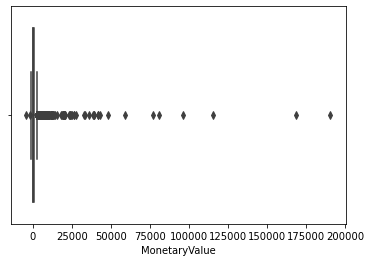

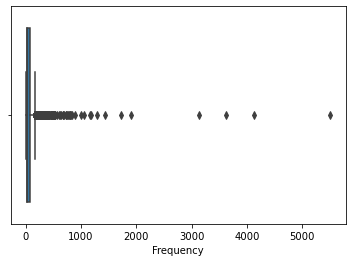

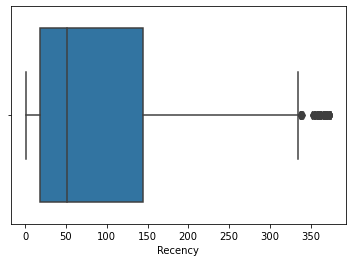

In [64]:
sns.boxplot(x=df_clust['MonetaryValue'])
plt.show()
sns.boxplot(x=df_clust['Frequency'])
plt.show()
sns.boxplot(x=df_clust['Recency'])
plt.show()

### We can see outliers for the the three columns

### Removing outliers

In [74]:
###Monetary_Value
Quartile_1M,Quartile_3M=np.percentile(df_clust['MonetaryValue'],(25,75))
IQR_M=Quartile_3M-Quartile_1M
Lower_bound_M=Quartile_1M-1.5*IQR_M
Upper_bound_M=Quartile_3M+1.5*IQR_M

In [77]:
###Recency
Quartile_1R,Quartile_3R=np.percentile(df_clust['Recency'],(25,75))
IQR_R=Quartile_3R-Quartile_1R
Lower_bound_R=Quartile_1R-1.5*IQR_R
Upper_bound_R=Quartile_3R+1.5*IQR_R

In [78]:
###Frequency
Quartile_1F,Quartile_3F=np.percentile(df_clust['Frequency'],(25,75))
IQR_F=Quartile_3F-Quartile_1F
Lower_bound_F=Quartile_1F-1.5*IQR_F
Upper_bound_F=Quartile_3F+1.5*IQR_F

In [79]:
df_clust_wo_out=df_clust.copy()

In [85]:
df_clust_wo_out.head()

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,326,2,0.00,3
12347.0,3,132,3124.96,12
12348.0,76,20,1009.88,7
12349.0,19,50,1344.17,10
12350.0,311,11,213.30,4


In [100]:
df_clust_wo_out=df_clust[(df_clust["MonetaryValue"] > Lower_bound_M)&(df_clust["MonetaryValue"] < Upper_bound_M)&(df_clust["Recency"] > Lower_bound_R)&(df_clust["Recency"] < Upper_bound_R)&(df_clust["Frequency"] > Lower_bound_F)&(df_clust["Frequency"] < Upper_bound_R)]

In [101]:
df_clust_wo_out

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,326,2,0.00,3
12348.0,76,20,1009.88,7
12349.0,19,50,1344.17,10
12350.0,311,11,213.30,4
12352.0,37,65,1469.03,10
...,...,...,...,...
18278.0,74,6,119.00,4
18280.0,278,5,91.70,3
18281.0,181,5,59.28,3


In [106]:
df_clust_wo_out.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,3763.000000,3763.000000,3763.000000,3763.000000
mean,91.025246,42.481796,606.312926,7.197715
std,90.930474,47.026641,563.276672,2.594462
min,1.000000,1.000000,-1190.260000,3.000000
25%,22.000000,11.000000,192.650000,5.000000
50%,54.000000,26.000000,404.400000,7.000000
75%,143.000000,57.000000,860.310000,9.000000
max,335.000000,334.000000,2534.340000,12.000000


In [104]:
df_clust_wo_out.to_csv('RFM_data_wo_outliers.csv')

### Large number of customers are removed on eliminating the outliers. This is not expected by the stores, as they want maximum number of customers to be considered for analysis.So we will consider the original RFM dataset for clustering.

In [57]:
df_clust[df_clust.MonetaryValue == 0]

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,326,2,0.0,3
13256.0,15,1,0.0,6
18268.0,135,2,0.0,4


In [58]:
len(df_clust[df_clust.MonetaryValue < 0])

49

In [59]:
df_clust.isna().sum()

Recency          0
Frequency        0
MonetaryValue    0
RFM_Score        0
dtype: int64

### Checking if the data is normally distributed or not

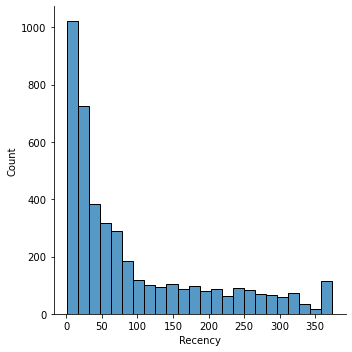

In [60]:
sns.displot(df_clust['Recency'])

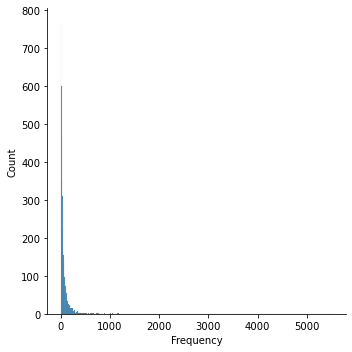

In [61]:
sns.displot(df_clust['Frequency'])

In [62]:
df_clust['Frequency'].max()

5511

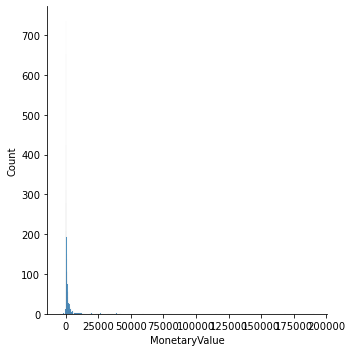

In [63]:
sns.displot(df_clust['MonetaryValue'])

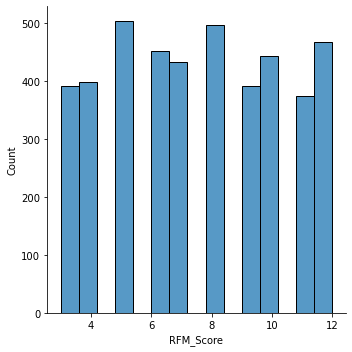

In [64]:
sns.displot(df_clust['RFM_Score'])

### As we are performing clustering analysis, data should be normally distributed. This is because column with higher variance willl get higher weightage during clustering, which is not correct.

#### It can be seen that data is Positively skewed for all the three columns. So we should use log transformation to reduce the skewness of data and make the data normal.

### Log Transformation

In [65]:
import numpy as np

In [66]:
log_df_clust=np.log(df_clust+1) #### If there is any value 0 then the log will be infinity. To avoid this we are adding 1

In [67]:
log_df_clust.head()

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,5.789960,1.098612,0.000000,1.386294
12347.0,1.386294,4.890349,8.047497,2.564949
12348.0,4.343805,3.044522,6.918577,2.079442
12349.0,2.995732,3.931826,7.204276,2.397895
12350.0,5.743003,2.484907,5.367377,1.609438


In [68]:
log_df_clust[log_df_clust.MonetaryValue == 0]

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,5.789960,1.098612,0.0,1.386294
13256.0,2.772589,0.693147,0.0,1.945910
18268.0,4.912655,1.098612,0.0,1.609438


In [69]:
log_df_clust.isna().sum() ### log Transformation has converted negative values to undefined values

Recency           0
Frequency         0
MonetaryValue    48
RFM_Score         0
dtype: int64

### As log transformation has converted negative values to undefined values, We cannot use log transformation directly. Instead we should scale the data and check the distribution.

### We need to scale the data to perform K means clustering as it is distance based algorithm.

## Standard Scaler

In [70]:
df_stand_scaled=df_clust.copy()

In [71]:
df_stand_scaled.head()

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,326,2,0.00,3
12347.0,3,132,3124.96,12
12348.0,76,20,1009.88,7
12349.0,19,50,1344.17,10
12350.0,311,11,213.30,4


In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
df_stand_scaled.columns

Index(['Recency', 'Frequency', 'MonetaryValue', 'RFM_Score'], dtype='object')

In [74]:
for x in df_stand_scaled.columns:
    df_stand_scaled[x] = StandardScaler().fit_transform(df_stand_scaled[x].values.reshape(len(df_stand_scaled), 1))

In [75]:
df_stand_scaled.head()

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,2.301699,-0.389524,-0.238854,-1.592663
12347.0,-0.891757,0.415798,0.324173,1.585767
12348.0,-0.170016,-0.278018,-0.056903,-0.180027
12349.0,-0.733567,-0.092175,0.003326,0.879449
12350.0,2.153396,-0.333771,-0.200424,-1.239504


### Checking the distribution of data

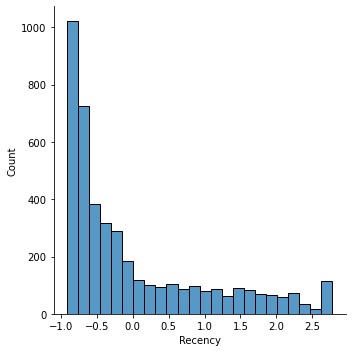

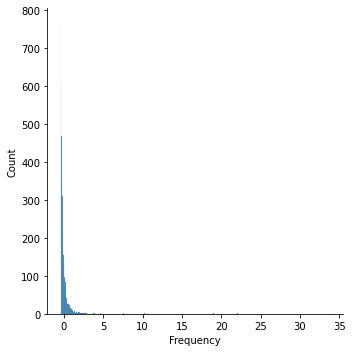

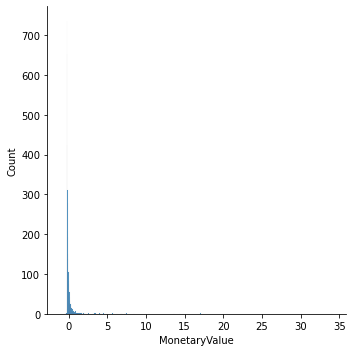

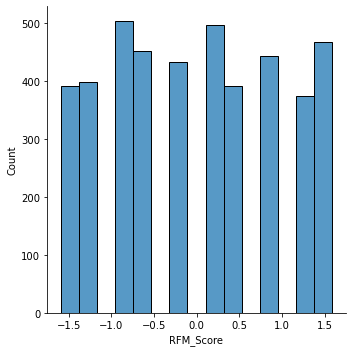

In [76]:
for x in df_stand_scaled.columns:
    sns.displot(df_stand_scaled[x])  

### Data is scaled but Not normally distributed

In [77]:
df_stand_scaled.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,4.353000e+03,4.353000e+03,4.353000e+03,4.353000e+03
mean,7.141338e-19,-3.742826e-18,-1.923220e-18,-4.213389e-17
std,1.000115e+00,1.000115e+00,1.000115e+00,1.000115e+00
min,-9.115308e-01,-3.957191e-01,-1.011361e+00,-1.592663e+00
25%,-7.434542e-01,-3.275764e-01,-2.026813e-01,-8.863454e-01
50%,-4.171878e-01,-2.222651e-01,-1.564980e-01,-1.800275e-01
75%,5.121770e-01,3.791584e-02,-3.403578e-02,8.794493e-01
max,2.776268e+00,3.373754e+01,3.404937e+01,1.585767e+00


### Standard scaling method invloves scaling such the it has negative values in columns. So we cannot apply log transformation to conevert it into gaussian distribution. This will again generate undefined values for negative values. Also from standard deviation values, it can be seen that the difference between the variance of columns is high. It is not good to use this data for clustering.

### Try with MinMax scaler

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
df_minmax_scaled=df_clust.copy()

In [80]:
df_minmax_scaled.head()

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,326,2,0.00,3
12347.0,3,132,3124.96,12
12348.0,76,20,1009.88,7
12349.0,19,50,1344.17,10
12350.0,311,11,213.30,4


In [81]:
for x in df_minmax_scaled.columns:
    df_minmax_scaled[x] = MinMaxScaler().fit_transform(df_minmax_scaled[x].values.reshape(len(df_minmax_scaled), 1))

In [82]:
df_minmax_scaled.head()

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,0.871314,0.000181,0.022033,0.000000
12347.0,0.005362,0.023775,0.038092,1.000000
12348.0,0.201072,0.003448,0.027223,0.444444
12349.0,0.048257,0.008893,0.028941,0.777778
12350.0,0.831099,0.001815,0.023129,0.111111


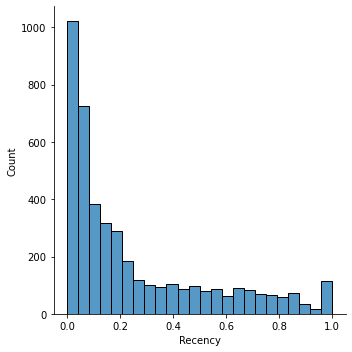

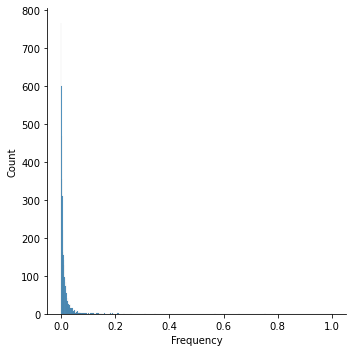

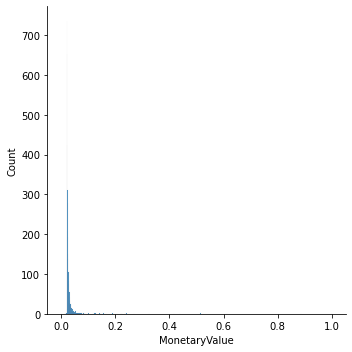

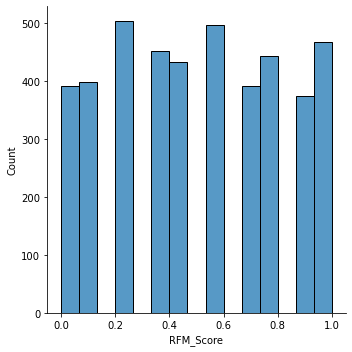

In [83]:
for x in df_minmax_scaled.columns:
    sns.displot(df_minmax_scaled[x])

### Minmax scaler has also not converted the data gaussian distribution

In [84]:
df_minmax_scaled.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,4353.000000,4353.000000,4353.000000,4353.000000
mean,0.247175,0.011593,0.028846,0.501085
std,0.271196,0.029300,0.028525,0.314657
min,0.000000,0.000000,0.000000,0.000000
25%,0.045576,0.001996,0.023065,0.222222
50%,0.134048,0.005082,0.024382,0.444444
75%,0.386059,0.012704,0.027875,0.777778
max,1.000000,1.000000,1.000000,1.000000


### As there are no negative values we can perform log transformation on this data to covert it into normal distribution. Also we can see from the standard deviation of the columns. Difference in variance of the columns is less compared to Standard Scaled data.

In [85]:
scaled_log_df_clust=np.log(df_minmax_scaled+1) #### If there is any value 0 then the log will be infinity. To avoid this we are adding 1

In [86]:
scaled_log_df_clust.head()

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,0.626641,0.000181,0.021794,0.000000
12347.0,0.005348,0.023497,0.037384,0.693147
12348.0,0.183215,0.003442,0.026859,0.367725
12349.0,0.047129,0.008854,0.028530,0.575364
12350.0,0.604916,0.001813,0.022866,0.105361


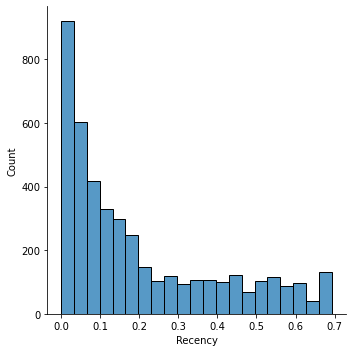

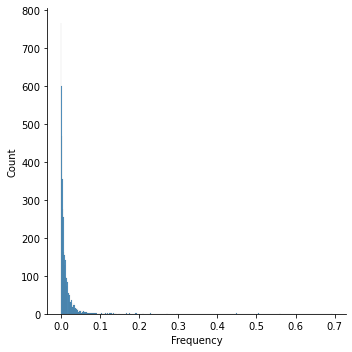

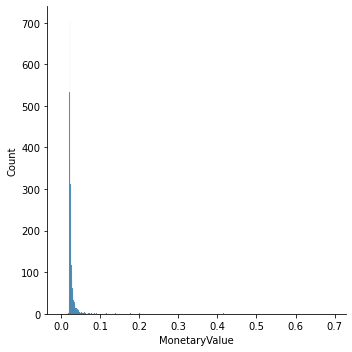

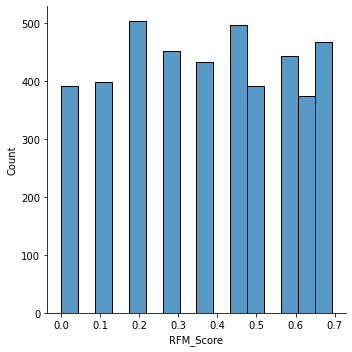

In [87]:
for x in scaled_log_df_clust.columns:
    sns.displot(scaled_log_df_clust[x])

In [88]:
scaled_log_df_clust.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,4353.000000,4353.000000,4353.000000,4353.000000
mean,0.200093,0.011202,0.028150,0.383408
std,0.197625,0.024032,0.022397,0.215720
min,0.000000,0.000000,0.000000,0.000000
25%,0.044568,0.001994,0.022803,0.200671
50%,0.125794,0.005069,0.024090,0.367725
75%,0.326464,0.012624,0.027494,0.575364
max,0.693147,0.693147,0.693147,0.693147


### Comparison:
### Standard Scaled data: Range for minimum and maximum values for all columns is not same (Cannot be used for Clustering)
### MinMax scaled data: Range for minimum and maximum values for all columns is same (Can be used for Clustering)
### Log of minmax scaled scaled data: Range for minimum and maximum values for all columns is same (Can be used for Clustering)

# We will use MinMax Scaled data for clustersing

## Applying K means Clustering

In [89]:
from sklearn.cluster import KMeans

In [90]:
k_means=KMeans(n_clusters=10)

## 1.Clustering on MinMax scaled data

In [91]:
df_minmax_scaled.head()

,Recency,Frequency,MonetaryValue,RFM_Score
CustomerID,,,,
12346.0,0.871314,0.000181,0.022033,0.000000
12347.0,0.005362,0.023775,0.038092,1.000000
12348.0,0.201072,0.003448,0.027223,0.444444
12349.0,0.048257,0.008893,0.028941,0.777778
12350.0,0.831099,0.001815,0.023129,0.111111


In [92]:
df_minmax_scaled.drop('RFM_Score',axis=1,inplace=True)

In [93]:
df_minmax_scaled.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,0.871314,0.000181,0.022033
12347.0,0.005362,0.023775,0.038092
12348.0,0.201072,0.003448,0.027223
12349.0,0.048257,0.008893,0.028941
12350.0,0.831099,0.001815,0.023129


In [94]:
#Creating the Model 
model = k_means.fit(df_minmax_scaled)
model

KMeans(n_clusters=10)

In [95]:
#Generate cluster predictions
Clusters = k_means.predict(df_minmax_scaled)

In [96]:
Clusters

array([7, 0, 6, ..., 0, 0, 2])

In [97]:
###Adding cluster labels to dataframe
df_minmax_scaled['Clusters']=Clusters

In [98]:
df_minmax_scaled.head(10)

,Recency,Frequency,MonetaryValue,Clusters
CustomerID,,,,
12346.0,0.871314,0.000181,0.022033,7
12347.0,0.005362,0.023775,0.038092,0
12348.0,0.201072,0.003448,0.027223,6
12349.0,0.048257,0.008893,0.028941,0
12350.0,0.831099,0.001815,0.023129,7
12352.0,0.096515,0.011615,0.029582,2
12353.0,0.546917,0.000363,0.022400,5
12354.0,0.621984,0.008348,0.026391,1
12355.0,0.573727,0.001452,0.023939,1


In [99]:
from sklearn import metrics

In [100]:
labels = k_means.labels_
metrics.silhouette_score(df_minmax_scaled, labels, metric = 'euclidean')

0.9605156475697992

In [101]:
labels

array([7, 0, 6, ..., 0, 0, 2])

#### Note: for Silhouette_score ranges between -1 to 1
#### SC near to 1 is expected 

## Elbow Method to find Optimum number of Clusters

In [102]:
### Elbow curve with Inertia (Sum of squared distances from cluster centroids)
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(df_minmax_scaled)
    sum_of_squared_distances.append(k_means.inertia_)


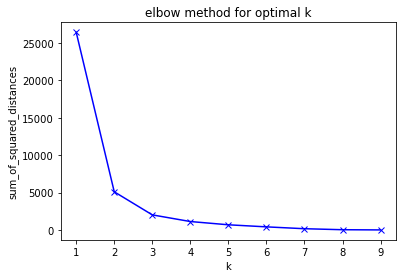

In [103]:
### Plot Elbow Curve
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

### From the Elbow curve it can be seen that number of clusters to be selected should be 3. This is because change in sum of sqaured distances is less after 3 clusters. 

In [104]:
### Finding Silhouette_score for k=2 to 8
Silhouette_score=[]
for i in range(2,10):
    k_means=KMeans(n_clusters=i,random_state=45)
    model = k_means.fit(df_minmax_scaled)
    Clusters = k_means.predict(df_minmax_scaled)
    log_df_clust['Clusters']=Clusters
    labels = k_means.labels_
    SC=metrics.silhouette_score(df_minmax_scaled, labels, metric = 'euclidean')
    Silhouette_score.append(SC)


In [105]:
Silhouette_score

[0.7242654048208299,
 0.749806284227824,
 0.7384099144490536,
 0.7756785987048143,
 0.8487913130288676,
 0.9092918432690071,
 0.9566116378985063,
 0.9600547932368826]

<AxesSubplot:xlabel='Clusters', ylabel='count'>

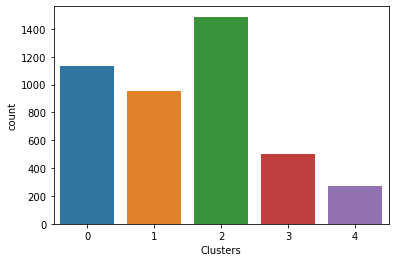

In [106]:
## k=5
k_means=KMeans(n_clusters=5,random_state=45)
model = k_means.fit(df_minmax_scaled)
Clusters = k_means.predict(df_minmax_scaled)
df_minmax_scaled['Clusters']=Clusters
sns.countplot(x="Clusters", data=df_minmax_scaled)

<AxesSubplot:xlabel='Clusters', ylabel='count'>

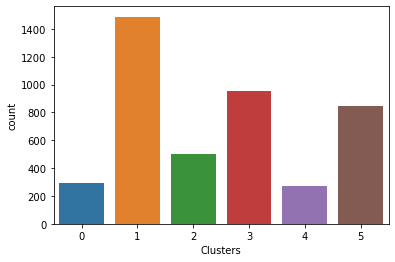

In [107]:
## k=6
k_means=KMeans(n_clusters=6,random_state=45)
model = k_means.fit(df_minmax_scaled)
Clusters = k_means.predict(df_minmax_scaled)
df_minmax_scaled['Clusters']=Clusters
sns.countplot(x="Clusters", data=df_minmax_scaled)

<AxesSubplot:xlabel='Clusters', ylabel='count'>

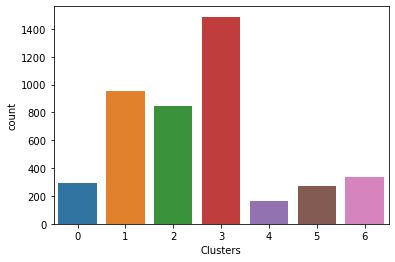

In [108]:
## K=7
k_means=KMeans(n_clusters=7,random_state=45)
model = k_means.fit(df_minmax_scaled)
Clusters = k_means.predict(df_minmax_scaled)
df_minmax_scaled['Clusters']=Clusters
sns.countplot(x="Clusters", data=df_minmax_scaled)

<AxesSubplot:xlabel='Clusters', ylabel='count'>

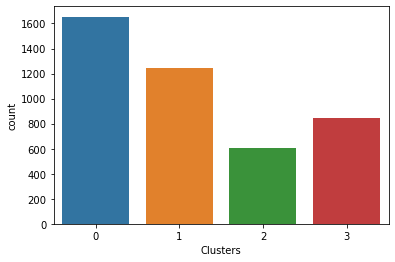

In [109]:
## K=4
k_means=KMeans(n_clusters=4,random_state=45)
model = k_means.fit(df_minmax_scaled)
Clusters = k_means.predict(df_minmax_scaled)
df_minmax_scaled['Clusters']=Clusters
sns.countplot(x="Clusters", data=df_minmax_scaled)

<AxesSubplot:xlabel='Clusters', ylabel='count'>

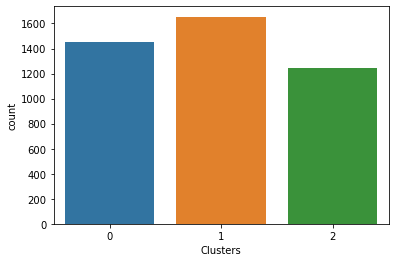

In [110]:
### K=3
k_means=KMeans(n_clusters=3,random_state=45)
model = k_means.fit(df_minmax_scaled)
Clusters = k_means.predict(df_minmax_scaled)
df_minmax_scaled['Clusters']=Clusters
sns.countplot(x="Clusters", data=df_minmax_scaled)

### As we can see that in elbow curve, Sum of sqaures shows minimum change after k=3. Also the SC for k=3 is good. The distribution of customers in the clusters is uniform. So we will select the value of k as 3

<AxesSubplot:xlabel='Clusters', ylabel='count'>

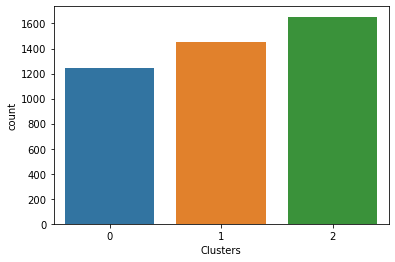

In [111]:
k_means=KMeans(n_clusters=3,random_state=45)
model = k_means.fit(df_minmax_scaled)
Clusters = k_means.predict(df_minmax_scaled)
df_minmax_scaled['Clusters']=Clusters
sns.countplot(x="Clusters", data=df_minmax_scaled)

In [112]:
df_minmax_scaled

,Recency,Frequency,MonetaryValue,Clusters
CustomerID,,,,
12346.0,0.871314,0.000181,0.022033,1
12347.0,0.005362,0.023775,0.038092,2
12348.0,0.201072,0.003448,0.027223,0
12349.0,0.048257,0.008893,0.028941,2
12350.0,0.831099,0.001815,0.023129,1
...,...,...,...,...
18280.0,0.742627,0.000726,0.022505,1
18281.0,0.482574,0.000726,0.022338,0
18282.0,0.018767,0.001452,0.022641,2


In [113]:
df_clust['Clusters']=df_minmax_scaled['Clusters']

In [114]:
df_clust

,Recency,Frequency,MonetaryValue,RFM_Score,Clusters
CustomerID,,,,,
12346.0,326,2,0.00,3,1
12347.0,3,132,3124.96,12,2
12348.0,76,20,1009.88,7,0
12349.0,19,50,1344.17,10,2
12350.0,311,11,213.30,4,1
...,...,...,...,...,...
18280.0,278,5,91.70,3,1
18281.0,181,5,59.28,3,0
18282.0,8,9,118.16,6,2


### Using Elbow Visualizer and Silhouette Visualizer yo optimize the results.
### Using Yelllowbrick and Kmeans from Scikit learn

In [115]:
df_minmax_scaled.drop(['Clusters'],axis=1,inplace=True)

In [116]:
df_minmax_scaled.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,0.871314,0.000181,0.022033
12347.0,0.005362,0.023775,0.038092
12348.0,0.201072,0.003448,0.027223
12349.0,0.048257,0.008893,0.028941
12350.0,0.831099,0.001815,0.023129


In [117]:
! pip install yellowbrick

In [118]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

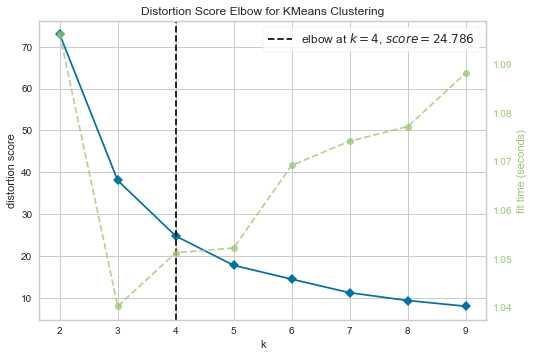

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
model = KMeans(random_state=42)

elb_visualizer = KElbowVisualizer(model, k=(2,10))
elb_visualizer.fit(df_minmax_scaled)    
elb_visualizer.show() 

### It is showing that 4 numbers of clusters are optimum
### We can see that distortion score is quite less, so the clusters are compact enough.

### Lets validate it by Silhouette Visualizer

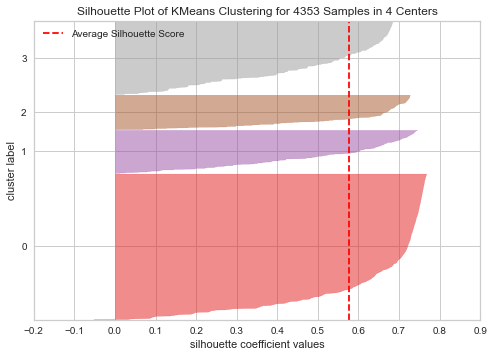

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4353 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [120]:
### Number of clusters = 4
model_4clust = KMeans(n_clusters = 4, random_state=42)

sil_visualizer = SilhouetteVisualizer(model_4clust)
sil_visualizer.fit(df_minmax_scaled)    
sil_visualizer.show()

### 1.Silhouette Score is good (Greater than 0.4). 
### 2.Also the Clusters are not overlapping.
### 3.But lets see if distribution of clusters can be improved.

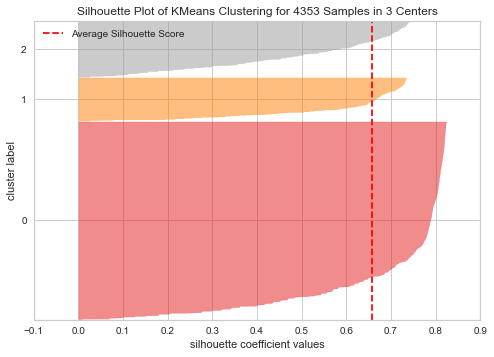

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4353 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [121]:
### Number of clusters = 3
model_3clust = KMeans(n_clusters = 3, random_state=43)

sil_visualizer = SilhouetteVisualizer(model_3clust)
sil_visualizer.fit(df_minmax_scaled)    
sil_visualizer.show()

### 1.Silhouette Score is improved.
### 2.Also the Clusters are not overlapping.
### 3.Distribution of clusters got disturbed.

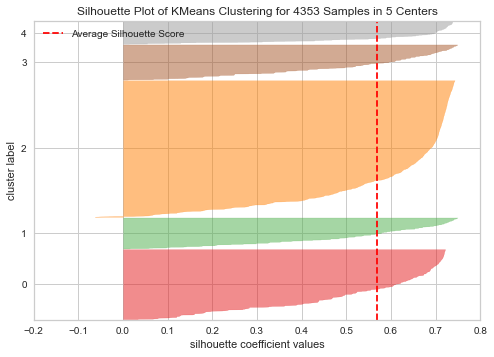

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4353 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [122]:
### Number of clusters = 5
model_5clust = KMeans(n_clusters = 5, random_state=43)

sil_visualizer = SilhouetteVisualizer(model_5clust)
sil_visualizer.fit(df_minmax_scaled)    
sil_visualizer.show()

### 1.Silhouette Score is good (Greater than 0.4). 
### 2.Clusters are not overlapping.
### 3. Cluster Distribution is disturbed.

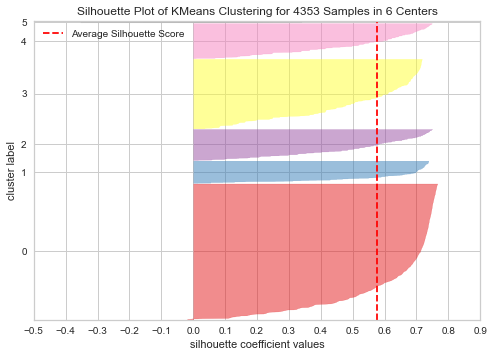

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4353 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [123]:
### Number of clusters = 6
model_6clust = KMeans(n_clusters = 6, random_state=43)

sil_visualizer = SilhouetteVisualizer(model_6clust)
sil_visualizer.fit(df_minmax_scaled)    
sil_visualizer.show()

### 1.Silhouette Score is good (Greater than 0.4). 
### 2.Clusters are not overlapping.
### 3.Cluster Distribution is disturbed.

# K=4 gives good results for Silhouette Coefficient and distribution of Clusters. So we will go with K=4.

In [124]:
## K=4
k_means=KMeans(n_clusters=4,random_state=45)
model = k_means.fit(df_minmax_scaled)
Clusters = k_means.predict(df_minmax_scaled)
df_minmax_scaled['Clusters']=Clusters

In [125]:
df_minmax_scaled.head()

,Recency,Frequency,MonetaryValue,Clusters
CustomerID,,,,
12346.0,0.871314,0.000181,0.022033,1
12347.0,0.005362,0.023775,0.038092,0
12348.0,0.201072,0.003448,0.027223,3
12349.0,0.048257,0.008893,0.028941,0
12350.0,0.831099,0.001815,0.023129,1


## Inserting Cluster column into original RFM dataset

In [126]:
df_clust['Clusters']=df_minmax_scaled['Clusters']

In [127]:
df_clust.head()

,Recency,Frequency,MonetaryValue,RFM_Score,Clusters
CustomerID,,,,,
12346.0,326,2,0.00,3,1
12347.0,3,132,3124.96,12,0
12348.0,76,20,1009.88,7,3
12349.0,19,50,1344.17,10,0
12350.0,311,11,213.30,4,1


# Visualizing clusters

In [128]:
import seaborn as sns

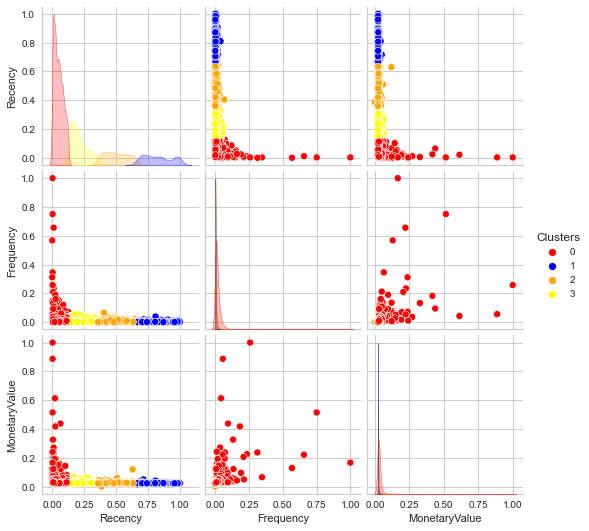

In [129]:
## With Scaled data
sns.pairplot(df_minmax_scaled,hue='Clusters',palette=['red','blue','orange','yellow'])

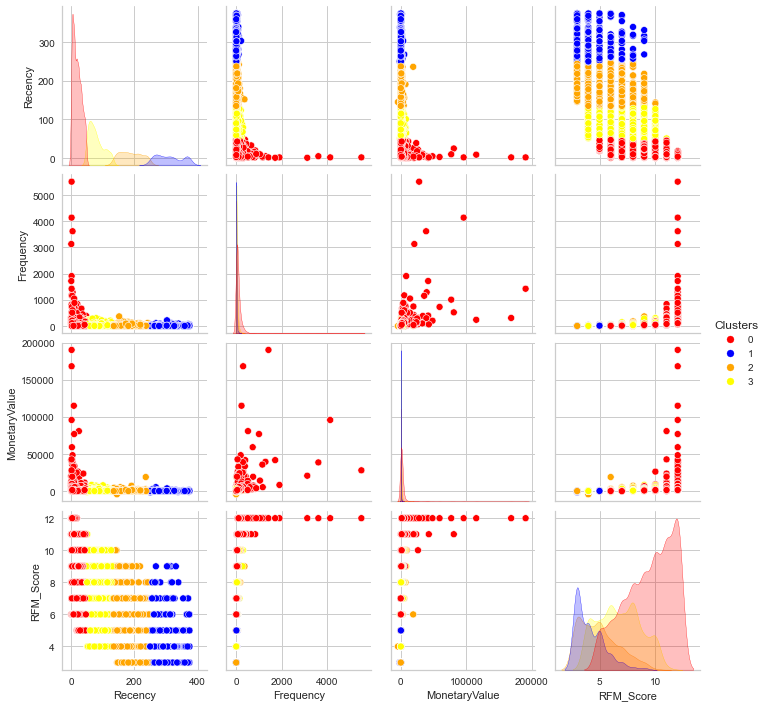

In [130]:
## With Original data
sns.pairplot(df_clust,hue='Clusters',palette=['red','blue','orange','yellow'])

## We can see that we got good and compact clusters. We will use this as our model with 4 clusters

In [131]:
df_clust.head()

,Recency,Frequency,MonetaryValue,RFM_Score,Clusters
CustomerID,,,,,
12346.0,326,2,0.00,3,1
12347.0,3,132,3124.96,12,0
12348.0,76,20,1009.88,7,3
12349.0,19,50,1344.17,10,0
12350.0,311,11,213.30,4,1


In [132]:
df_clust['CustomerID']= df_clust.index

In [133]:
df_clust.head()

,Recency,Frequency,MonetaryValue,RFM_Score,Clusters,CustomerID
CustomerID,,,,,,
12346.0,326,2,0.00,3,1,12346.0
12347.0,3,132,3124.96,12,0,12347.0
12348.0,76,20,1009.88,7,3,12348.0
12349.0,19,50,1344.17,10,0,12349.0
12350.0,311,11,213.30,4,1,12350.0


In [134]:
df_clust.index = np.arange(1, len(df_clust)+1)

In [135]:
df_clust.head()

,Recency,Frequency,MonetaryValue,RFM_Score,Clusters,CustomerID
1,326,2,0.00,3,1,12346.0
2,3,132,3124.96,12,0,12347.0
3,76,20,1009.88,7,3,12348.0
4,19,50,1344.17,10,0,12349.0
5,311,11,213.30,4,1,12350.0


In [150]:
df_clust.to_csv('RFM_data.csv')

In [136]:
df_clust.groupby('Clusters')['CustomerID'].count()

Clusters
0    2143
1     519
2     642
3    1049
Name: CustomerID, dtype: int64

In [137]:
df_clust_summary = df_clust.groupby('Clusters').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':'mean','RFM_Score':'mean'})

In [138]:
df_clust_summary
### Average value of Recency, Frequency, Monetary Value and RFM_Score.

,Recency,Frequency,MonetaryValue,RFM_Score
Clusters,,,,
0,19.078861,102.038731,2160.459501,9.436771
1,309.570328,16.059730,246.551676,4.142582
2,188.140187,24.563863,439.011933,4.953271
3,79.450906,37.794090,696.984719,6.803622


## It can be seen that Cluster 0 is with highest average RFM Score and Cluster 1 is with Lowest average RFM Score.

### We will create a customer list for the Stores that we have grouped. So that It will be beneficial for them to provide benefits according to scores of customers.

## We are deploying the results for customers based on our analysis

In [139]:
### Diamond Customers
Diamond_Customers=df_clust[df_clust['Clusters']==0]

In [140]:
Diamond_Customers.index = np.arange(1, len(Diamond_Customers)+1)

In [141]:
Diamond_Customers

,Recency,Frequency,MonetaryValue,RFM_Score,Clusters,CustomerID
1,3,132,3124.96,12,0,12347.0
2,19,50,1344.17,10,0,12349.0
3,37,65,1469.03,10,0,12352.0
4,23,46,2080.18,10,0,12356.0
5,34,88,3928.41,11,0,12357.0
...,...,...,...,...,...,...
2139,18,16,-63.87,7,0,18274.0
2140,22,12,243.18,6,0,18276.0
2141,8,9,118.16,6,0,18282.0
2142,4,511,1450.29,12,0,18283.0


In [142]:
Diamond_Customers.to_excel('Diamond_Customers.xlsx')

In [143]:
### Platinum Customers
Platinum_Customers=df_clust[df_clust['Clusters']==3]
Platinum_Customers.index = np.arange(1, len(Platinum_Customers)+1)
Platinum_Customers

,Recency,Frequency,MonetaryValue,RFM_Score,Clusters,CustomerID
1,76,20,1009.88,7,3,12348.0
2,53,88,1835.86,10,3,12360.0
3,110,13,344.70,6,3,12363.0
4,52,109,2133.38,10,3,12370.0
5,60,41,961.60,8,3,12371.0
...,...,...,...,...,...,...
1045,51,69,338.21,8,3,18252.0
1046,90,4,65.60,4,3,18255.0
1047,73,35,600.40,8,3,18265.0
1048,59,8,110.38,4,3,18277.0


In [144]:
Platinum_Customers.to_excel('Platinum_Customers.xlsx')

In [145]:
### Gold Customers
Gold_Customers=df_clust[df_clust['Clusters']==2]
Gold_Customers.index = np.arange(1, len(Gold_Customers)+1)
Gold_Customers

,Recency,Frequency,MonetaryValue,RFM_Score,Clusters,CustomerID
1,205,3,71.30,3,2,12353.0
2,233,47,848.02,7,2,12354.0
3,215,9,370.80,4,2,12355.0
4,185,64,1178.19,8,2,12383.0
5,149,37,1202.11,8,2,12405.0
...,...,...,...,...,...,...
638,219,53,909.64,7,2,18239.0
639,173,95,1606.59,9,2,18260.0
640,141,10,110.28,4,2,18262.0
641,135,2,0.00,4,2,18268.0


In [146]:
Gold_Customers.to_excel('Gold_Customers.xlsx')

In [147]:
### Silver Customers
Silver_Customers=df_clust[df_clust['Clusters']==1]
Silver_Customers.index = np.arange(1, len(Silver_Customers)+1)
Silver_Customers

,Recency,Frequency,MonetaryValue,RFM_Score,Clusters,CustomerID
1,326,2,0.00,3,1,12346.0
2,311,11,213.30,4,1,12350.0
3,288,7,139.20,3,1,12361.0
4,292,17,574.34,6,1,12365.0
5,312,10,240.30,4,1,12373.0
...,...,...,...,...,...,...
515,326,1,440.00,4,1,18233.0
516,302,15,240.27,5,1,18250.0
517,355,3,-40.75,3,1,18256.0
518,359,6,99.90,3,1,18269.0


In [148]:
Silver_Customers.to_excel('Silver_Customers.xlsx')

## Thus we have performed Clustering Analysis on Customer data of stores and provided them with proper customer segmentation. Using this segmentation they can give selective benefits to the group of customers in order to gain profit and retain the customers.